# Exploratory Data Analysis of the Politfact and LAIR datasets

# Politifact 
##### Fact-checking (FC) articles which contains pairs (multimodal tweet and a FC-article) from politifact.com.
##### Source: https://paperswithcode.com/dataset/politifact

In [2]:
%pip install pandas torch matplotlib seaborn category_encoders scikit-learn nltk > /dev/null 2>&1

import pandas as pd
import os
import re
import random
from wordcloud import WordCloud
import torch
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Ploting
import matplotlib.pyplot as plt
import seaborn as sns

# Encoders
from category_encoders import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Supervised Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import SVC

# Unsupervised Learning
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

# Training Types and Metrics
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import classification_report, f1_score, fbeta_score, make_scorer, ConfusionMatrixDisplay

#Ensemble
from sklearn.ensemble import RandomForestClassifier

# Stop Words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))



O sistema n�o conseguiu localizar o caminho especificado.


Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jaime\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Load Dataset

In [54]:
#Loading Politifact Dataset
politifact=pd.read_json(os.path.join('Datasets','politifact_factcheck_data.json'), lines=True)


### Clean Dataset

In [55]:
def cleaner(text):
    text = re.sub('[.*?]|\w*\d\w*|\n|https?:\\\S+|www\.\S+|<.*?>+', ' ', text)
    #text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\\W', " ", text)
    return text

def standardize_data(sentence,stopwords):
    treated_tokens=[]
    #convert lower case
    sentence_lower=sentence.lower()
    #tokenize
    word_tokens = word_tokenize(sentence_lower)
    #remove stop words
    #standardize words using stemming or lematization
    for word in word_tokens:
        if word not in stopwords and len(word) > 3:
            word = lemmatizer.lemmatize(word, pos="v")
            treated_tokens.append(word)
    
    # join all the treated tokens again 
    return ' '.join(treated_tokens)



politifact['statement'].apply(lambda x: standardize_data(cleaner(x), stop_words))


# Convert datetime to data type
politifact['statement_date'] = pd.to_datetime(politifact['statement_date'])
politifact['factcheck_date'] = pd.to_datetime(politifact['factcheck_date'])

politifact.head()

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\jaime\AppData\Local\Temp\ipykernel_42284\3048992446.py:2: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('[.*?]|\w*\d\w*|\n|https?:\\\S+|www\.\S+|<.*?>+', ' ', text)


0        john mccain oppose bankruptcy protections fami...
1                      bennie thompson actively cheer riot
2           say maggie hassan state days last three months
3         bust inflate covid number accuse violate federal
4        republican candidate actually reduce size gove...
                               ...                        
21147    say large trade deficit japan stem send millio...
21148          tens thousands people leave york every week
21149         fight share value without ideologue partisan
21150    germany halt covid vaccines say unsafe longer ...
21151    say otherwise healthy people experience mild m...
Name: statement, Length: 21152, dtype: object

,verdict,statement_originator,statement,statement_date,statement_source,factchecker,factcheck_date,factcheck_analysis_link
0,true,Barack Obama,John McCain opposed bankruptcy protections for...,2008-06-11,speech,Adriel Bettelheim,2008-06-16,https://www.politifact.com/factchecks/2008/jun...
1,false,Matt Gaetz,"""Bennie Thompson actively cheer-led riots in t...",2022-06-07,television,Yacob Reyes,2022-06-13,https://www.politifact.com/factchecks/2022/jun...
2,mostly-true,Kelly Ayotte,"Says Maggie Hassan was ""out of state on 30 day...",2016-05-18,news,Clay Wirestone,2016-05-27,https://www.politifact.com/factchecks/2016/may...
3,false,Bloggers,"""BUSTED: CDC Inflated COVID Numbers, Accused o...",2021-02-01,blog,Madison Czopek,2021-02-05,https://www.politifact.com/factchecks/2021/feb...
4,half-true,Bobby Jindal,"""I'm the only (Republican) candidate that has ...",2015-08-30,television,Linda Qiu,2015-08-30,https://www.politifact.com/factchecks/2015/aug...


### Verdicts

([<matplotlib.patches.Wedge at 0x1ddfe793290>,
 [Text(-0.8157590025801075, 0.7379276724107238, 'false'),
  Text(-0.8860037322860806, -0.6519182359584179, 'half-true'),
  Text(0.11805708395555334, -1.09364643506387, 'mostly-false'),
  Text(0.9863189827722179, -0.48700602072579924, 'mostly-true'),
  Text(0.9963009125736392, 0.4662450982100874, 'pants-fire'),
  Text(0.3934827867293877, 1.0272153116789466, 'true')],
 [Text(-0.44495945595278585, 0.402506003133122, '26.6%'),
  Text(-0.48327476306513484, -0.3555917650682279, '17.0%'),
  Text(0.06439477306666545, -0.5965344191257472, '16.2%'),
  Text(0.5379921724212097, -0.26563964766861775, '15.8%'),
  Text(0.5434368614038031, 0.2543155081145931, '12.8%'),
  Text(0.21462697457966598, 0.560299260915789, '11.6%')])

Text(0.5, 1.0, 'Verdict Distribution')

(-1.0999997338895313,
 1.0999999498793287,
 -1.0999993346612218,
 1.099999968317201)

([<matplotlib.patches.Wedge at 0x1de134e1f40>,
 [Text(-0.8307114556886245, 0.7210537271158695, 'news'),
  Text(-0.6995992432940833, -0.848858585856529, 'social_media'),
  Text(0.5681032619816313, -0.9419440979834366, 'speech'),
  Text(1.0318746481648569, -0.38109672062962285, 'campaign'),
  Text(1.0999990170927225, -0.0014705084306051491, 'advertisement'),
  Text(1.0419553178005978, 0.35260334046497005, 'other'),
  Text(0.8824078441284948, 0.6567772808346084, 'blog'),
  Text(0.6965690144981586, 0.851346937529621, 'television'),
  Text(0.5418682423583319, 0.9572767666268164, 'radio'),
  Text(0.38492555320900734, 1.030452482401173, 'statement'),
  Text(0.24017451684319677, 1.0734599207511835, 'email'),
  Text(0.12698709318896714, 1.0926455409525162, 'meeting'),
  Text(0.0396921278332223, 1.0992836462842843, 'testimony')],
 [Text(-0.4531153394665224, 0.39330203297229244, '27.2%'),
  Text(-0.3815995872513181, -0.4630137741035612, '23.6%'),
  Text(0.3098745065354352, -0.5137876898091472, '1

Text(0.5, 1.0, 'Statement Source Distribution')

(-1.0999994536026363,
 1.0999999739809847,
 -1.0999996447434173,
 1.0999999830830198)

<Axes: xlabel='verdict', ylabel='count'>

Text(0.5, 1.0, 'Verdicts per Source')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Verdict')

<Axes: xlabel='verdict', ylabel='count'>

Text(0.5, 1.0, 'True/False Verdicts per Source')

Text(0, 0.5, 'Count')

Text(0.5, 0, 'Verdict')

<Axes: ylabel='statement_originator'>

Text(0.5, 1.0, 'Top 10 Most Fact-Checked Statement Originators')

Text(0.5, 0, 'Number of Fact-Checked Statements')

Text(0, 0.5, 'Statement Originator')

<Axes: ylabel='statement_originator'>

Text(0.5, 1.0, 'Top 10 Liars (Most False Statements)')

Text(0.5, 0, 'Number of False Statements')

Text(0, 0.5, 'Statement Originator')

C:\Users\jaime\AppData\Local\Temp\ipykernel_42284\2524986538.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  false_data['year'] = false_data['statement_date'].dt.year


<BarContainer object of 8 artists>

Text(0.5, 1.0, 'Number of False Verdicts in the Last 10 Years (2015 - 2025)')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Count of False Verdicts')

C:\Users\jaime\AppData\Local\Temp\ipykernel_42284\2524986538.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_data['year'] = true_data['statement_date'].dt.year


<BarContainer object of 8 artists>

Text(0.5, 1.0, 'Number of True Verdicts in the Last 10 Years (2015 - 2025)')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Count of True Verdicts')

<Axes: xlabel='statement_source'>

Text(0.5, 1.0, 'Top 10 Sources with the Most False Verdicts')

Text(0.5, 0, 'Source (Statement Source)')

Text(0, 0.5, 'Count of False Verdicts')

<Axes: xlabel='statement_source'>

Text(0.5, 1.0, 'Top 10 Sources with the Most True Verdicts')

Text(0.5, 0, 'Source (Statement Source)')

Text(0, 0.5, 'Count of True Verdicts')

<BarContainer object of 6 artists>

Text(0.5, 1.0, "Donald Trump's Statements")

Text(0.5, 0, 'Verdict')

Text(0, 0.5, 'Count')

<BarContainer object of 6 artists>

Text(0.5, 1.0, "Barack Obama's Statements")

Text(0.5, 0, 'Verdict')

Text(0, 0.5, 'Count')

(-0.5, 799.5, 399.5, -0.5)

Text(0.5, 1.0, 'Word Cloud for True Statements')

(-0.5, 799.5, 399.5, -0.5)

Text(0.5, 1.0, 'Word Cloud for False Statements')

(-0.5, 799.5, 399.5, -0.5)

Text(0.5, 1.0, 'Word Cloud for Social Media Statements')

(-0.5, 799.5, 399.5, -0.5)

Text(0.5, 1.0, 'Word Cloud for Donald Trump Statements')

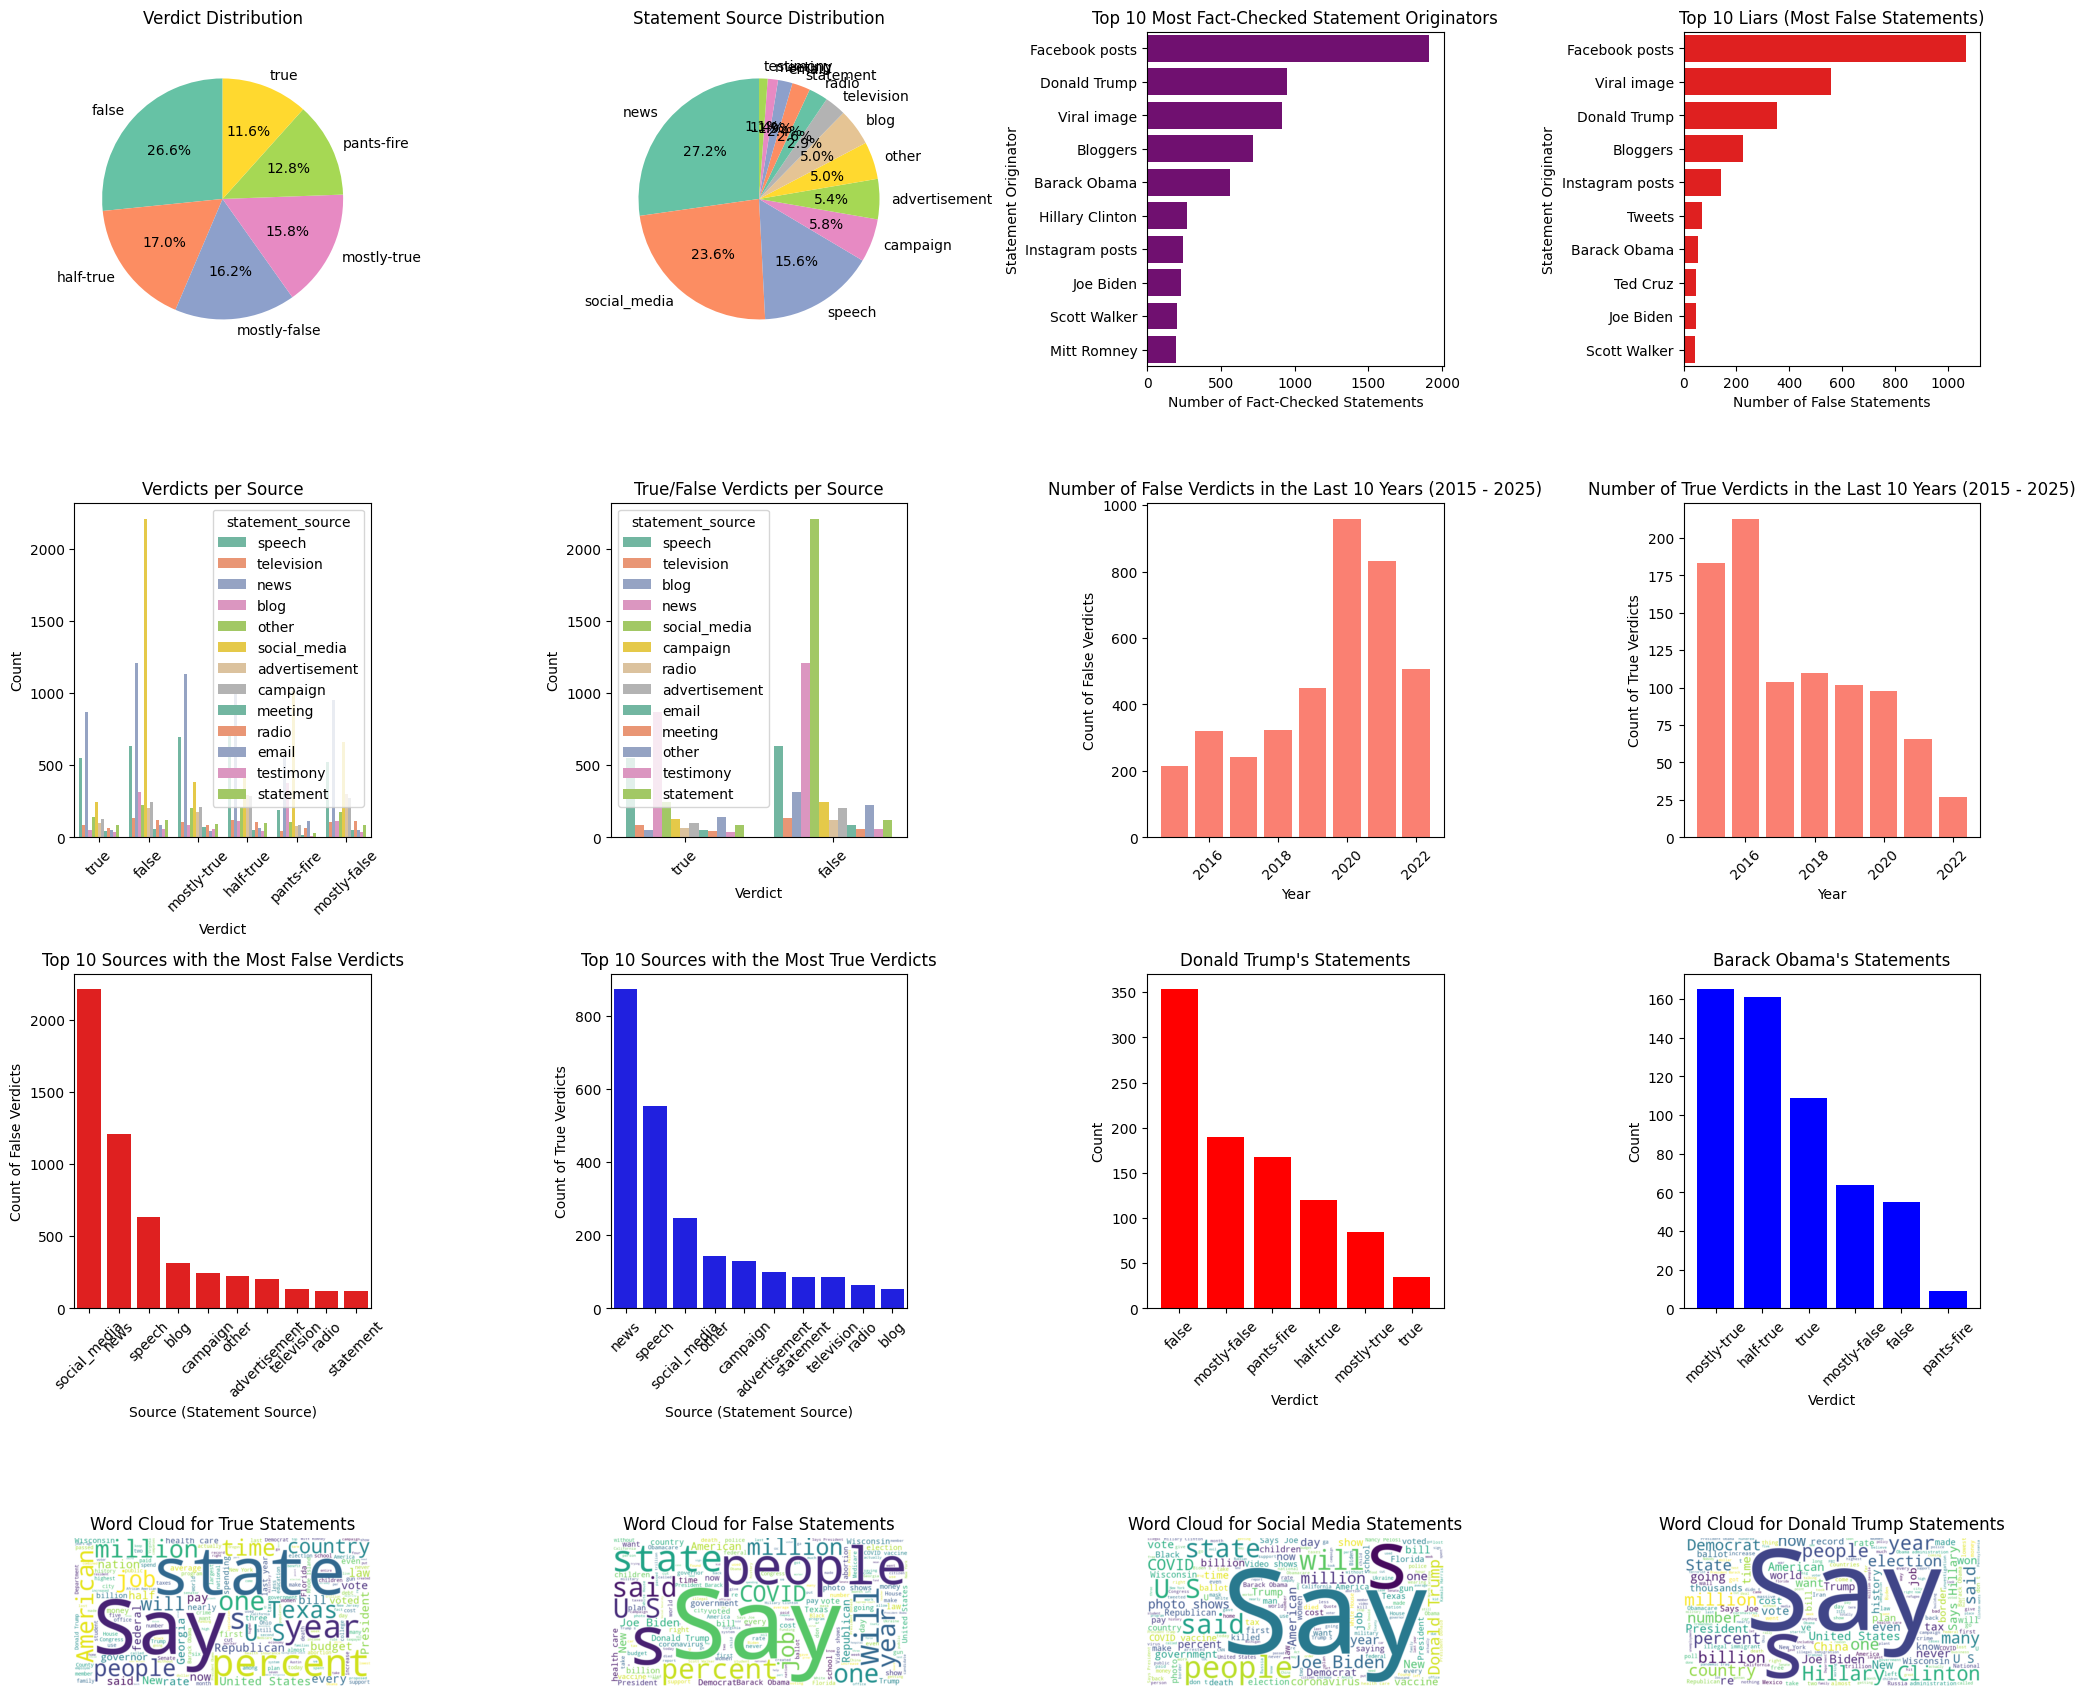

In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a 3x3 grid for subplots (since we have 9 plots now)
fig, axs = plt.subplots(4, 4, figsize=(20, 18))

#---------------Verdict distribution---------------  
verdict_counts = politifact['verdict'].value_counts()
axs[0, 0].pie(verdict_counts, labels=verdict_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(verdict_counts)))
axs[0, 0].set_title("Verdict Distribution")
axs[0, 0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#---------------Statement source distribution---------------  
source_counts = politifact['statement_source'].value_counts()
axs[0, 1].pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(source_counts)))
axs[0, 1].set_title("Statement Source Distribution")
axs[0, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.



#---------------Verdict/Source relation---------------  
sns.countplot(data=politifact, x='verdict', hue='statement_source', palette='Set2', order=politifact['verdict'].unique(), ax=axs[1, 0])
axs[1, 0].set_title("Verdicts per Source")
axs[1, 0].set_ylabel('Count')
axs[1, 0].set_xlabel('Verdict')
axs[1, 0].tick_params(axis='x', rotation=45)



#---------------True/False Verdict and Source---------------  
filtered_data = politifact[politifact['verdict'].isin(['true', 'false'])]
sns.countplot(data=filtered_data, x='verdict', hue='statement_source', palette='Set2', order=['true', 'false'], ax=axs[1, 1])
axs[1, 1].set_title("True/False Verdicts per Source")
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_xlabel('Verdict')
axs[1, 1].tick_params(axis='x', rotation=45)




#---------------Top 10 Most Fact-Checked Statement Originators---------------  
# Count the occurrences of each statement originator
originator_counts = politifact['statement_originator'].value_counts()

# Get the top 10 most fact-checked originators
top_10_originators = originator_counts.head(10)

# Plot the top 10 most fact-checked statement originators
sns.barplot(x=top_10_originators.values, y=top_10_originators.index, color='purple', ax=axs[0, 2])
axs[0, 2].set_title("Top 10 Most Fact-Checked Statement Originators")
axs[0, 2].set_xlabel('Number of Fact-Checked Statements')
axs[0, 2].set_ylabel('Statement Originator')


# Filter the dataset to include only rows where the verdict is 'false'
false_data = politifact[politifact['verdict'] == 'false']

# Count the occurrences of each statement originator for false statements
false_originator_counts = false_data['statement_originator'].value_counts()

# Get the top 10 statement originators with the most false statements
top_10_liars = false_originator_counts.head(10)

# Plot the top 10 liars (statement originators with the most false statements)
sns.barplot(x=top_10_liars.values, y=top_10_liars.index, color='red', ax=axs[0, 3])
axs[0, 3].set_title("Top 10 Liars (Most False Statements)")
axs[0, 3].set_xlabel('Number of False Statements')
axs[0, 3].set_ylabel('Statement Originator')





#---------------False Verdicts Over Time (Last 10 Years)---------------  
# Get the current year  
current_year = pd.to_datetime('today').year

# Filter the data to include only false verdicts  
false_data = politifact[politifact['verdict'] == 'false']

# Extract the year from the statement_date  
false_data['year'] = false_data['statement_date'].dt.year

# Filter the data to include only the last 10 years  
last_10_years_data = false_data[false_data['year'] >= (current_year - 10)]

# Group the data by year and count the number of false verdicts per year  
false_verdicts_last_10_years = last_10_years_data.groupby('year').size()

# Plot the number of false verdicts throughout the last 10 years  
axs[1, 2].bar(false_verdicts_last_10_years.index, false_verdicts_last_10_years.values, color='salmon')
axs[1, 2].set_title(f"Number of False Verdicts in the Last 10 Years ({current_year-10} - {current_year})")
axs[1, 2].set_xlabel('Year')
axs[1, 2].set_ylabel('Count of False Verdicts')
axs[1, 2].tick_params(axis='x', rotation=45)




#---------------True Verdicts Over Time (Last 10 Years)---------------  
# Get the current year  
current_year = pd.to_datetime('today').year

# Filter the data to include only false verdicts  
true_data = politifact[politifact['verdict'] == 'true']

# Extract the year from the statement_date  
true_data['year'] = true_data['statement_date'].dt.year

# Filter the data to include only the last 10 years  
last_10_years_data = true_data[true_data['year'] >= (current_year - 10)]

# Group the data by year and count the number of false verdicts per year  
true_verdicts_last_10_years = last_10_years_data.groupby('year').size()

# Plot the number of false verdicts throughout the last 10 years  
axs[1, 3].bar(true_verdicts_last_10_years.index, true_verdicts_last_10_years.values, color='salmon')
axs[1, 3].set_title(f"Number of True Verdicts in the Last 10 Years ({current_year-10} - {current_year})")
axs[1, 3].set_xlabel('Year')
axs[1, 3].set_ylabel('Count of True Verdicts')
axs[1, 3].tick_params(axis='x', rotation=45)




#---------------Biggest Liars and Truth Tellers---------------  
# Filter the dataset to include only rows where the verdict is 'false' for false verdicts  
false_sources_counts = false_data['statement_source'].value_counts()  
top_10_false_sources = false_sources_counts.head(10)

# Filter the dataset to include only rows where the verdict is 'true' for true verdicts  
true_data = politifact[politifact['verdict'] == 'true']  
true_sources_counts = true_data['statement_source'].value_counts()  
top_10_true_sources = true_sources_counts.head(10)

# Plot the top 10 false sources  
sns.barplot(x=top_10_false_sources.index, y=top_10_false_sources.values, color='red', ax=axs[2, 0])  
axs[2, 0].set_title("Top 10 Sources with the Most False Verdicts")  
axs[2, 0].set_xlabel('Source (Statement Source)')  
axs[2, 0].set_ylabel('Count of False Verdicts')  
axs[2, 0].tick_params(axis='x', rotation=45)

# Plot the top 10 true sources  
sns.barplot(x=top_10_true_sources.index, y=top_10_true_sources.values, color='blue', ax=axs[2, 1])  
axs[2, 1].set_title("Top 10 Sources with the Most True Verdicts")  
axs[2, 1].set_xlabel('Source (Statement Source)')  
axs[2, 1].set_ylabel('Count of True Verdicts')  
axs[2, 1].tick_params(axis='x', rotation=45)

#---------------Donald Trump True/False Statement Distribution---------------  
trump_data = politifact[politifact['statement_originator'] == 'Donald Trump']  
trump_verdict_counts = trump_data['verdict'].value_counts()  

# Plot Trump True/False Statement Count  
axs[2, 2].bar(trump_verdict_counts.index, trump_verdict_counts.values, color='red')  
axs[2, 2].set_title("Donald Trump's Statements")  
axs[2, 2].set_xlabel('Verdict')  
axs[2, 2].set_ylabel('Count')  
axs[2, 2].tick_params(axis='x', rotation=45)


#---------------Obama True/False Statement Distribution---------------  
obama_data = politifact[politifact['statement_originator'] == 'Barack Obama']  
obama_verdict_counts = obama_data['verdict'].value_counts()  

# Plot Trump True/False Statement Count  
axs[2, 3].bar(obama_verdict_counts.index, obama_verdict_counts.values, color='blue')  
axs[2, 3].set_title("Barack Obama's Statements")  
axs[2, 3].set_xlabel('Verdict')  
axs[2, 3].set_ylabel('Count')  
axs[2, 3].tick_params(axis='x', rotation=45)




#---------------Word Cloud for True Statements---------------  
true_statements = ' '.join(true_data['statement'].dropna())  
true_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(true_statements)  
axs[3, 0].imshow(true_wordcloud, interpolation='bilinear')  
axs[3, 0].axis('off')  
axs[3, 0].set_title("Word Cloud for True Statements")

#---------------Word Cloud for False Statements---------------  
false_statements = ' '.join(false_data['statement'].dropna())  
false_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(false_statements)  
axs[3, 1].imshow(false_wordcloud, interpolation='bilinear')  
axs[3, 1].axis('off')  
axs[3, 1].set_title("Word Cloud for False Statements")


#---------------Word Cloud for Social Media Statements---------------  
social_media_data = politifact[politifact['statement_source'] == 'social_media']  
social_media_statements = ' '.join(social_media_data['statement'].dropna())  
social_media_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(social_media_statements)  
axs[3, 2].imshow(social_media_wordcloud, interpolation='bilinear')  
axs[3, 2].axis('off')  
axs[3, 2].set_title("Word Cloud for Social Media Statements")

#---------------Word Cloud for Donald Trump Statements---------------  
trump_data = politifact[politifact['statement_originator'] == 'Donald Trump']  
trump_statements = ' '.join(trump_data['statement'].dropna())  
trump_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(trump_statements)  
axs[3, 3].imshow(trump_wordcloud, interpolation='bilinear')  
axs[3, 3].axis('off')  
axs[3, 3].set_title("Word Cloud for Donald Trump Statements")



# Adjust layout to make room for everything
plt.tight_layout()

# Show the combined image
plt.savefig("EDA v2.png")  # Saves as PNG
plt.show()


# LIAR Dataset
##### LIAR is a publicly available dataset for fake news detection. A decade-long of 12.8K manually labeled short statements were collected in various contexts from POLITIFACT.COM, which provides detailed analysis report and links to source documents for each case. This dataset can be used for fact-checking research as well. Notably, this new dataset is an order of magnitude larger than previously largest public fake news datasets of similar type. The LIAR dataset4 includes 12.8K human labeled short statements from POLITIFACT.COM’s API, and each statement is evaluated by a POLITIFACT.COM editor for its truthfulness.

##### Source:  https://paperswithcode.com/dataset/liar

In [7]:
#Load Dataset
liar = pd.read_csv(os.path.join('Datasets','LIAR.tsv'), sep="\t", header=None)


In [8]:
#Clean Dataset
liar.columns = ["ID",'verdict', 'statement', 'subject', 'originator', 'job_title', 'state', 'party', '1', '2', '3', '4', '5', 'source']
liar.drop(columns=['ID','1', '2', '3', '4', '5'], inplace=True)

# liar['statement'].apply(lambda x: standardize_data(cleaner(x), stop_words))


Text(0.5, 0.98, 'Exploratory Data Analysis of LIAR Dataset')

C:\Users\jaime\AppData\Local\Temp\ipykernel_27952\1221407153.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=liar, x='verdict', order=liar['verdict'].value_counts().index, palette='Set2', ax=axes[0, 0])


<Axes: xlabel='verdict', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Verdict Labels')

Text(0.5, 0, 'Verdict')

Text(0, 0.5, 'Count')

<Axes: xlabel='party', ylabel='count'>

Text(0.5, 1.0, 'Comparison of Verdicts Between Republicans and Democrats')

Text(0.5, 0, 'Party')

Text(0, 0.5, 'Count')

C:\Users\jaime\AppData\Local\Temp\ipykernel_27952\1221407153.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_subjects.index, y=top_subjects.values, palette='pastel', ax=axes[0, 2])


<Axes: xlabel='subject'>

Text(0.5, 1.0, 'Top 10 Most Common Subjects')

Text(0.5, 0, 'Subject')

Text(0, 0.5, 'Count')

C:\Users\jaime\AppData\Local\Temp\ipykernel_27952\1221407153.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs_truthful.index, y=top_jobs_truthful.values, palette='Greens', ax=axes[1, 0])


<Axes: xlabel='job_title'>

Text(0.5, 1.0, 'Top 10 Most Truthful Jobs')

Text(0.5, 0, 'Job Title')

Text(0, 0.5, 'Count')

C:\Users\jaime\AppData\Local\Temp\ipykernel_27952\1221407153.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs_lying.index, y=top_jobs_lying.values, palette='Reds', ax=axes[1, 1])


<Axes: xlabel='job_title'>

Text(0.5, 1.0, 'Top 10 Most Lying Jobs')

Text(0.5, 0, 'Job Title')

Text(0, 0.5, 'Count')

C:\Users\jaime\AppData\Local\Temp\ipykernel_27952\1221407153.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_lying_states.index, y=top_lying_states.values, palette='Oranges', ax=axes[1, 2])


<Axes: xlabel='state'>

Text(0.5, 1.0, 'Top 10 Most Lying States')

Text(0.5, 0, 'State')

Text(0, 0.5, 'Count')

C:\Users\jaime\AppData\Local\Temp\ipykernel_27952\1221407153.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sources_truthful.index, y=top_sources_truthful.values, palette='Blues', ax=axes[2, 0])


<Axes: xlabel='source'>

Text(0.5, 1.0, 'Top 10 Most Truthful Sources')

Text(0.5, 0, 'Source')

Text(0, 0.5, 'Count')

C:\Users\jaime\AppData\Local\Temp\ipykernel_27952\1221407153.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sources_lying.index, y=top_sources_lying.values, palette='Purples', ax=axes[2, 1])


<Axes: xlabel='source'>

Text(0.5, 1.0, 'Top 10 Most Lying Sources')

Text(0.5, 0, 'Source')

Text(0, 0.5, 'Count')

(0.0, 1.0, 0.0, 1.0)

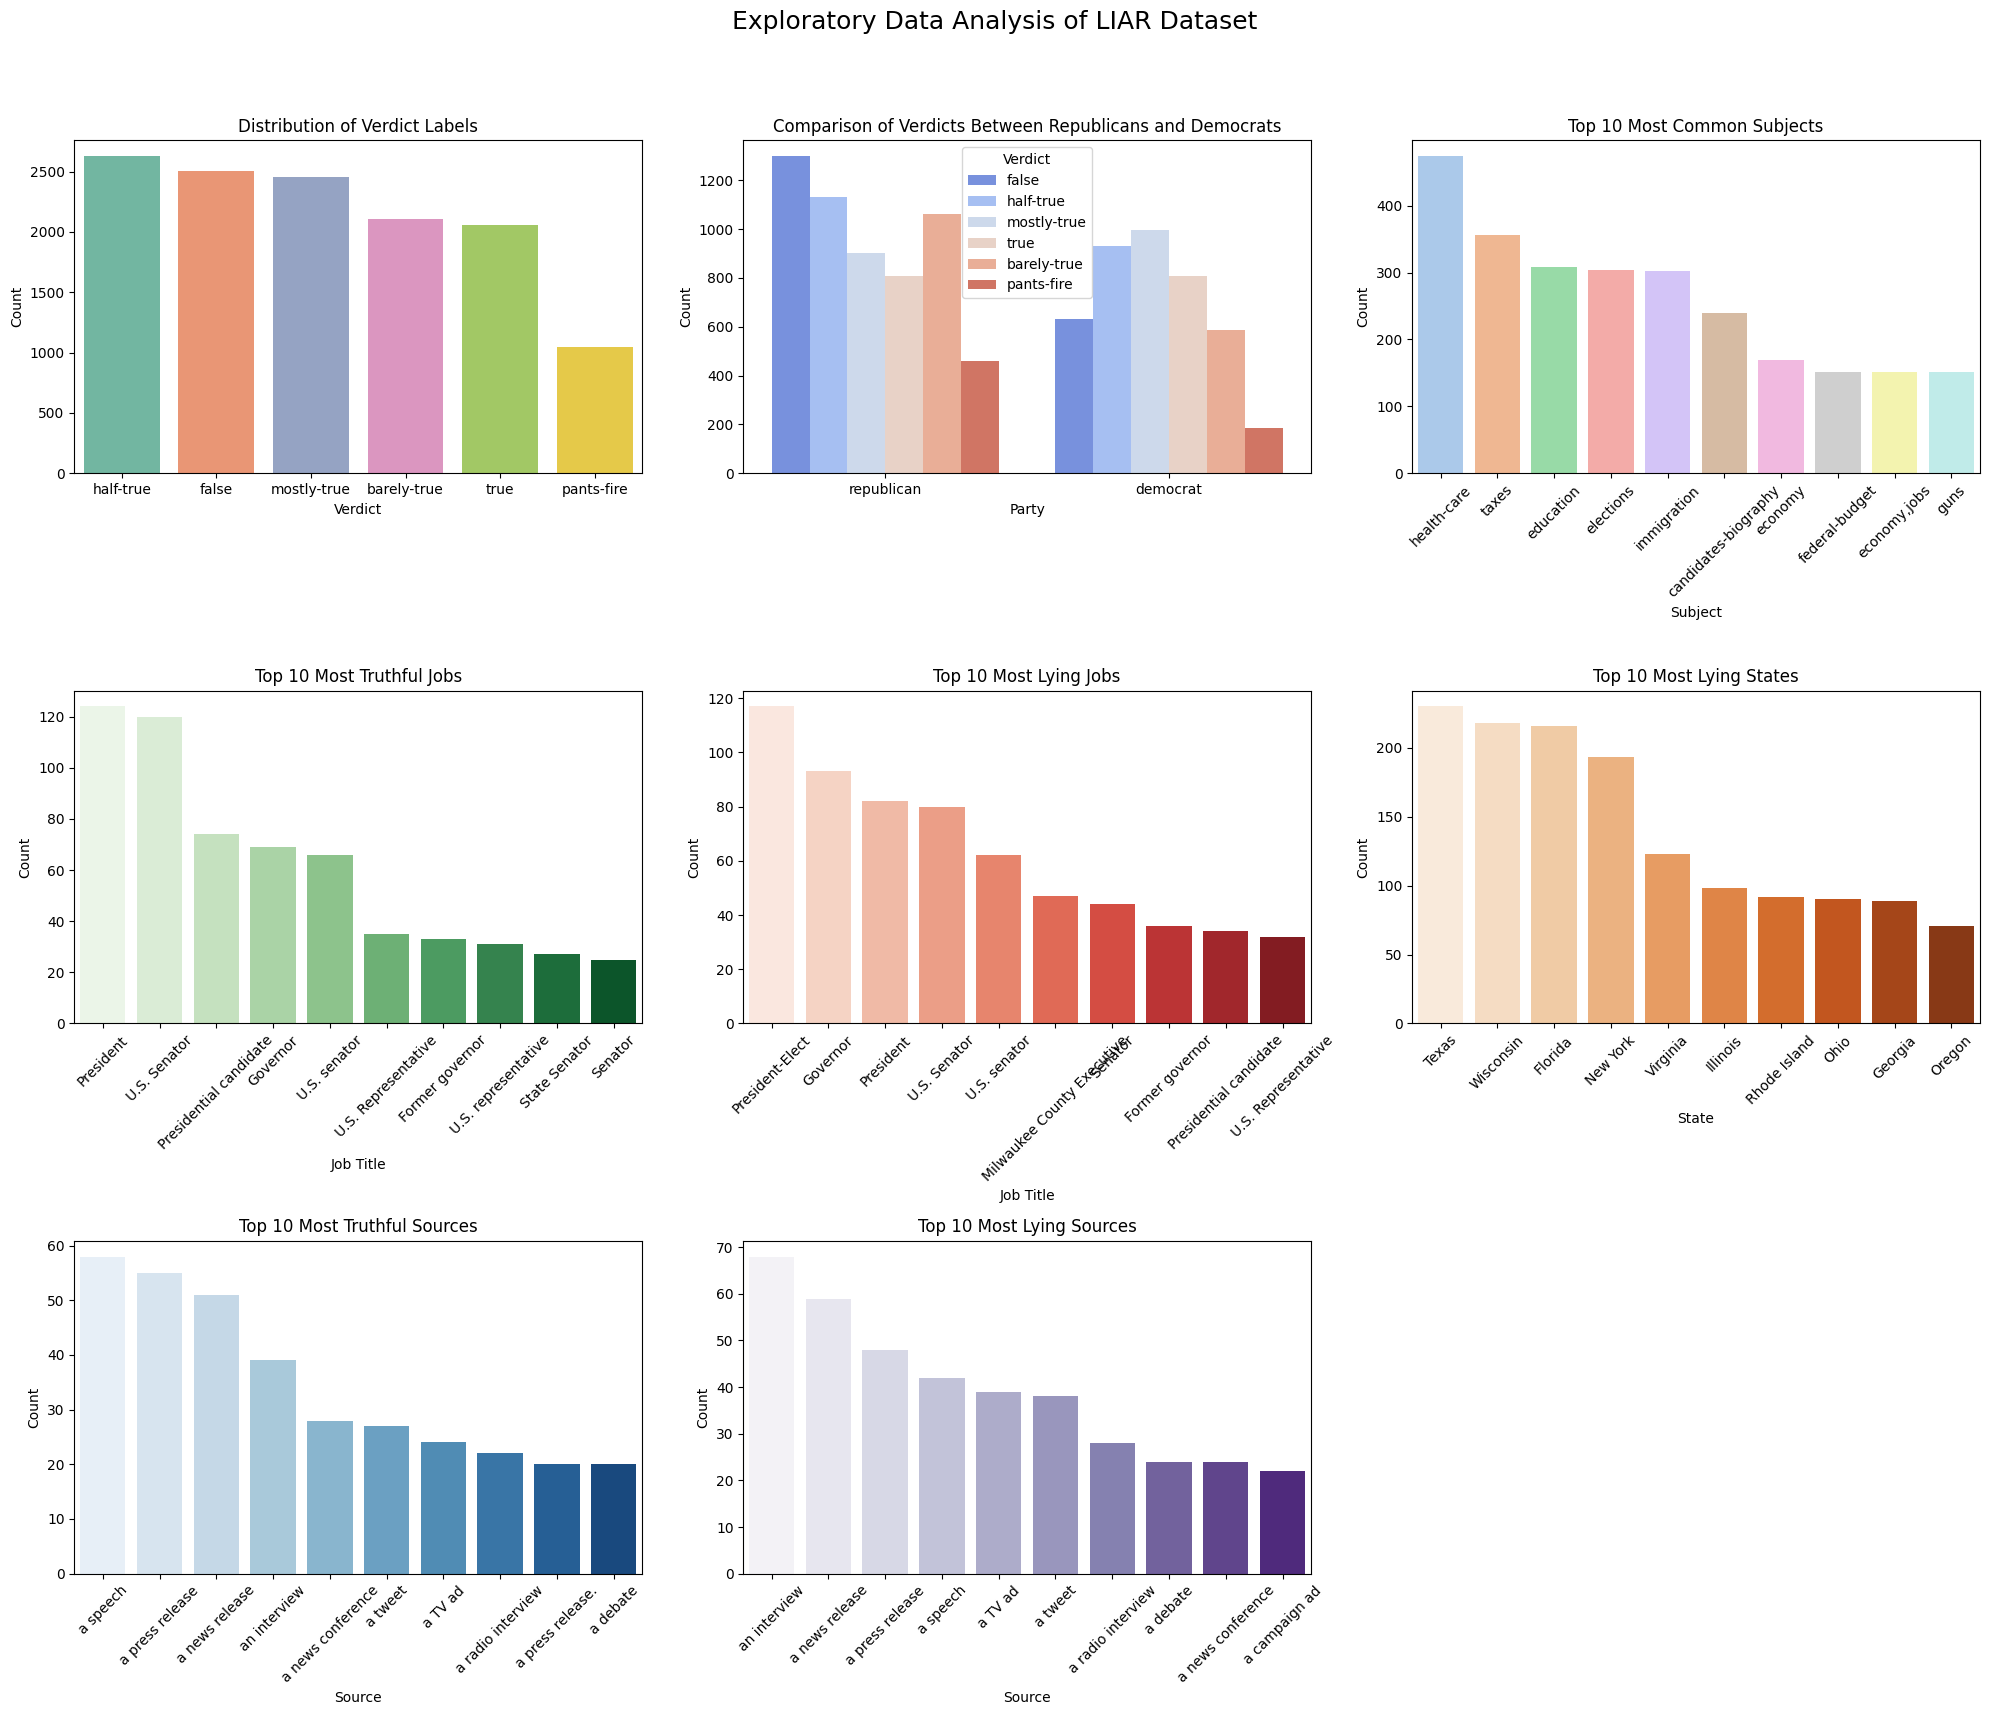

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a single image with multiple subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
fig.suptitle("Exploratory Data Analysis of LIAR Dataset", fontsize=18)

# Verdict Distribution
sns.countplot(data=liar, x='verdict', order=liar['verdict'].value_counts().index, palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Verdict Labels")
axes[0, 0].set_xlabel("Verdict")
axes[0, 0].set_ylabel("Count")

# Verdict Comparison Between Republicans and Democrats
sns.countplot(data=liar[liar['party'].isin(['republican', 'democrat'])], x='party', hue='verdict', palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title("Comparison of Verdicts Between Republicans and Democrats")
axes[0, 1].set_xlabel("Party")
axes[0, 1].set_ylabel("Count")
axes[0, 1].legend(title="Verdict")

# Top 10 Most Common Subjects
top_subjects = liar['subject'].value_counts().nlargest(10)
sns.barplot(x=top_subjects.index, y=top_subjects.values, palette='pastel', ax=axes[0, 2])
axes[0, 2].set_title("Top 10 Most Common Subjects")
axes[0, 2].set_xlabel("Subject")
axes[0, 2].set_ylabel("Count")
axes[0, 2].tick_params(axis='x', rotation=45)

# Top 10 Most Lying and Truthful Jobs
top_jobs_truthful = liar[liar['verdict'] == 'true']['job_title'].value_counts().nlargest(10)
top_jobs_lying = liar[liar['verdict'] == 'false']['job_title'].value_counts().nlargest(10)

sns.barplot(x=top_jobs_truthful.index, y=top_jobs_truthful.values, palette='Greens', ax=axes[1, 0])
axes[1, 0].set_title("Top 10 Most Truthful Jobs")
axes[1, 0].set_xlabel("Job Title")
axes[1, 0].set_ylabel("Count")
axes[1, 0].tick_params(axis='x', rotation=45)

sns.barplot(x=top_jobs_lying.index, y=top_jobs_lying.values, palette='Reds', ax=axes[1, 1])
axes[1, 1].set_title("Top 10 Most Lying Jobs")
axes[1, 1].set_xlabel("Job Title")
axes[1, 1].set_ylabel("Count")
axes[1, 1].tick_params(axis='x', rotation=45)

# Top 10 Most Lying States
top_lying_states = liar[liar['verdict'] == 'false']['state'].value_counts().nlargest(10)
sns.barplot(x=top_lying_states.index, y=top_lying_states.values, palette='Oranges', ax=axes[1, 2])
axes[1, 2].set_title("Top 10 Most Lying States")
axes[1, 2].set_xlabel("State")
axes[1, 2].set_ylabel("Count")
axes[1, 2].tick_params(axis='x', rotation=45)

# Top 10 Most Lying and Truthful Sources
top_sources_truthful = liar[liar['verdict'] == 'true']['source'].value_counts().nlargest(10)
top_sources_lying = liar[liar['verdict'] == 'false']['source'].value_counts().nlargest(10)

sns.barplot(x=top_sources_truthful.index, y=top_sources_truthful.values, palette='Blues', ax=axes[2, 0])
axes[2, 0].set_title("Top 10 Most Truthful Sources")
axes[2, 0].set_xlabel("Source")
axes[2, 0].set_ylabel("Count")
axes[2, 0].tick_params(axis='x', rotation=45)

sns.barplot(x=top_sources_lying.index, y=top_sources_lying.values, palette='Purples', ax=axes[2, 1])
axes[2, 1].set_title("Top 10 Most Lying Sources")
axes[2, 1].set_xlabel("Source")
axes[2, 1].set_ylabel("Count")
axes[2, 1].tick_params(axis='x', rotation=45)

# Remove empty subplot
axes[2, 2].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit all plots

#save plt
plt.savefig("LIAR EDA v2.png")  # Saves as PNG

plt.show()
